## Importamos librerias

In [2]:
# Para visualización en notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_context('poster')
mpl.rcParams['figure.figsize'] = (8,6)
import os

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx

from glob import glob
from pathlib import Path
import powerlaw

## Bajamos datos
### Primero datos de sujetos

## Luego atlas
### Son 116 regiones cerebrales
La columna "1" indica el nombre de la subregión, la columna "3" indica a qué región cerebral pertenece, la columna "4" en qué hemisferio se localiza (L=izquierda, R=derecham, --= está en la línea media), las columnas "5", "6" y "7" indican las coordenadas x, y, z de cada subregión

In [3]:
RegionsNames = pd.read_csv("aal_extended_withCoords.csv", header=None).iloc[:,1:]
RegionsNames

,1,2,3,4,5,6,7
0,Precentral_L,2001,Central,L,-39,-6,51
1,Precentral_R,2002,Central,R,41,-8,52
2,Frontal_Sup_L,2101,Frontal,L,-18,35,42
3,Frontal_Sup_R,2102,Frontal,R,22,31,44
4,Frontal_Sup_Orb_L,2111,Frontal,L,-17,47,-13
...,...,...,...,...,...,...,...
111,Vermis_6,9130,Cerebelum,--,2,-67,-15
112,Vermis_7,9140,Cerebelum,--,2,-72,-25
113,Vermis_8,9150,Cerebelum,--,2,-64,-34
114,Vermis_9,9160,Cerebelum,--,2,-55,-35


## Lista de archivos
Tenemos varios sujetos para 4 condiciones, una correspondiente a vigilia y 3 a diferentes estadios del sueño no REM (*rapid eye movement*):<br>

"W": despierto ("Wake")
<br> "N1": sueño "leve"
<br>"N2": sueño "intermedio"
<br>"N3": sueño "profundo"

In [12]:
files = os.listdir('DataSujetos/')
files

['N1_suj1.csv',
 'N1_suj10.csv',
 'N1_suj11.csv',
 'N1_suj12.csv',
 'N1_suj13.csv',
 'N1_suj14.csv',
 'N1_suj15.csv',
 'N1_suj16.csv',
 'N1_suj17.csv',
 'N1_suj18.csv',
 'N1_suj2.csv',
 'N1_suj3.csv',
 'N1_suj4.csv',
 'N1_suj5.csv',
 'N1_suj6.csv',
 'N1_suj7.csv',
 'N1_suj8.csv',
 'N1_suj9.csv',
 'N2_suj1.csv',
 'N2_suj10.csv',
 'N2_suj11.csv',
 'N2_suj12.csv',
 'N2_suj13.csv',
 'N2_suj14.csv',
 'N2_suj15.csv',
 'N2_suj16.csv',
 'N2_suj17.csv',
 'N2_suj18.csv',
 'N2_suj2.csv',
 'N2_suj3.csv',
 'N2_suj4.csv',
 'N2_suj5.csv',
 'N2_suj6.csv',
 'N2_suj7.csv',
 'N2_suj8.csv',
 'N2_suj9.csv',
 'N3_suj1.csv',
 'N3_suj10.csv',
 'N3_suj11.csv',
 'N3_suj12.csv',
 'N3_suj13.csv',
 'N3_suj14.csv',
 'N3_suj15.csv',
 'N3_suj16.csv',
 'N3_suj17.csv',
 'N3_suj18.csv',
 'N3_suj2.csv',
 'N3_suj3.csv',
 'N3_suj4.csv',
 'N3_suj5.csv',
 'N3_suj6.csv',
 'N3_suj7.csv',
 'N3_suj8.csv',
 'N3_suj9.csv',
 'W_suj1.csv',
 'W_suj10.csv',
 'W_suj11.csv',
 'W_suj12.csv',
 'W_suj13.csv',
 'W_suj14.csv',
 'W_suj15.csv'

Obtener archivos correspondientes a la condición "W" unicamente:

In [13]:
filenames = Path('DataSujetos').glob('W_*.csv')
next(filenames)

WindowsPath('DataSujetos/W_suj1.csv')

# Vamos a analizar el sujeto 1 de la condición W
Levantamos los datos y los transformamos en una matriz de adyacencia pesada

In [26]:
filename = 'DataSujetos/W_suj2.csv'
df = pd.read_csv(filename, header=None)
matAdyacPesada = df.values
n = matAdyacPesada.shape[0]
matAdyacPesada -= np.diag(np.ones(n))

Graficamos la matriz de ayacencia pesada

(0.0, 116.0)

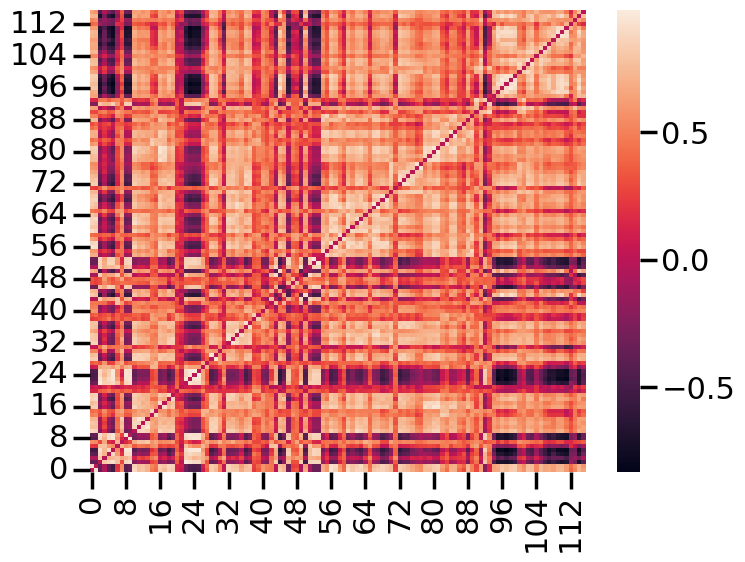

In [27]:
sns.heatmap(matAdyacPesada)
plt.xlim(0,n)
plt.ylim(0,n)

Le ponemos un umbral "th" para binarizarla hacia una matriz de adyacencia no pesada:

(0.0, 116.0)

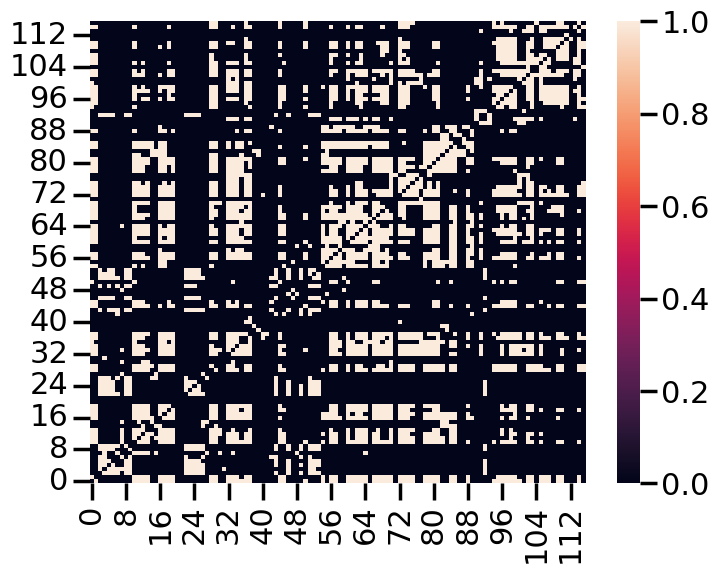

In [28]:
th=0.65
matAdyacNoPesada = matAdyacPesada>=th
sns.heatmap(matAdyacNoPesada)
plt.xlim(0,n)
plt.ylim(0,n)

## Creamos un grafo con la librería Networkx

In [20]:
G = nx.from_numpy_array(matAdyacNoPesada)

# Visualizaciones
Graficamos al grafo con los nodos dispuestos de diferentes formas

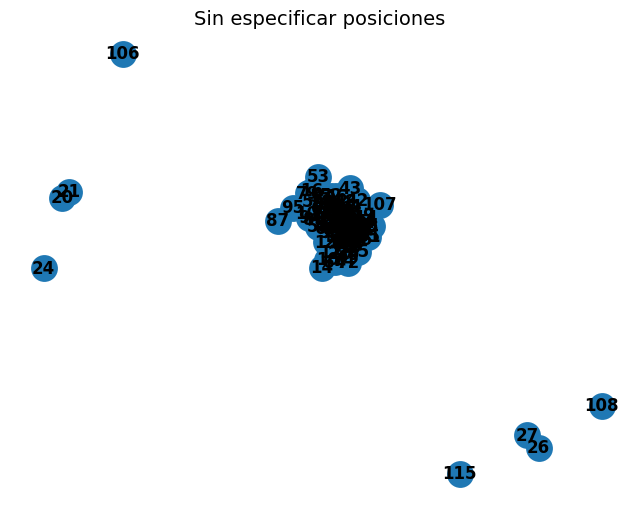

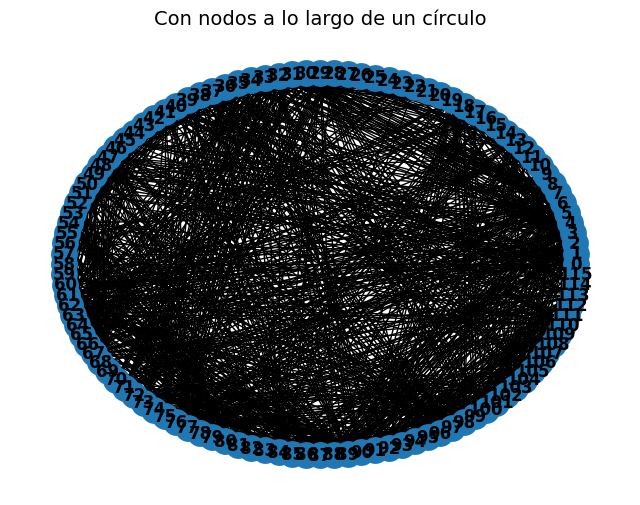

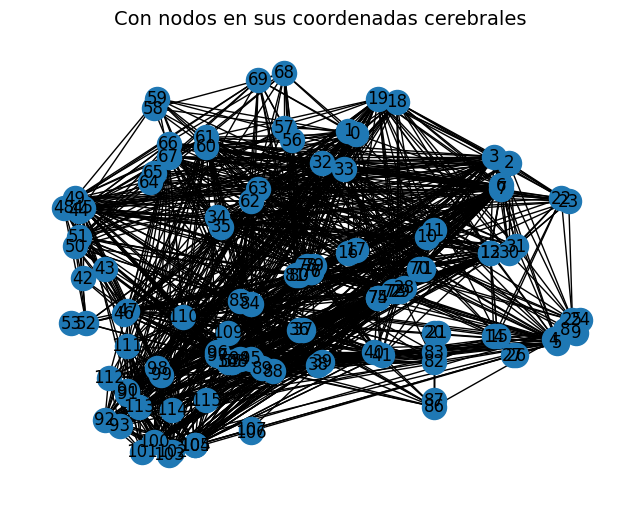

In [29]:
plt.figure(figsize=(8,6))
plt.title('Sin especificar posiciones', fontsize=14)
nx.draw(G, with_labels=True, font_weight='bold')

plt.figure(figsize=(8,6))
plt.title('Con nodos a lo largo de un círculo', fontsize=14)
layout=nx.circular_layout(G)
nx.draw(G,layout, with_labels=True, font_weight='bold')


plt.figure(figsize=(8,6))
plt.title('Con nodos en sus coordenadas cerebrales', fontsize=14)
layout=dict(zip(range(n),np.array([RegionsNames[6].values, RegionsNames[7].values]).T))
nx.draw(G,layout, with_labels=True, linewidths =1)








# Graficamos el grafo con cada nodo coloreado de acuerdo a su grado (cantidad de enlances que posee)

<ipython-input-11-b5043dff2e88>:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


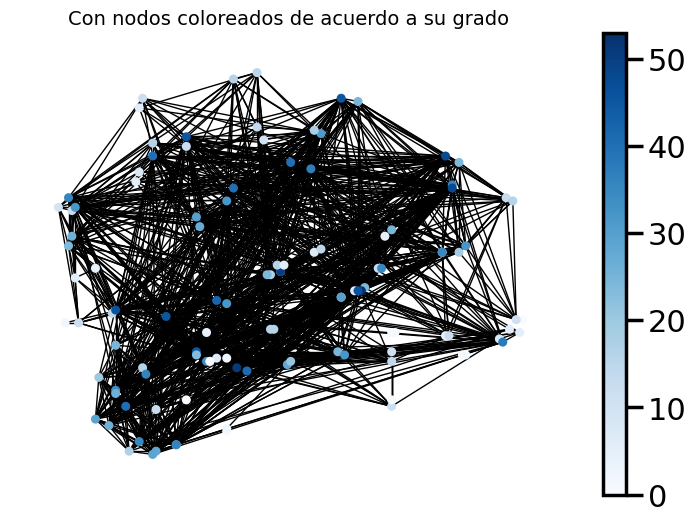

In [ ]:
degrees = G.degree() # Diccionario con ID de nodo y su grado
nodes = G.nodes()
n_color = np.asarray([degrees[n] for n in nodes])
plt.figure(figsize=(9,6))
plt.title('Con nodos coloreados de acuerdo a su grado', fontsize=14)
layout=dict(zip(range(n),np.array([RegionsNames[6].values, RegionsNames[7].values]).T))
vmin = min(n_color)
vmax = max(n_color)
cmap=plt.cm.Blues
nx.draw(G, layout, node_size=20, node_color=n_color, vmin=vmin, vmax=vmax,cmap=cmap)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
plt.colorbar(sm)


Cuál es el nodo con más enlaces?

In [ ]:
sortedNodes=sorted(G.degree, key=lambda x: x[1], reverse=True)
print('El nodo con mayor grado es el',sortedNodes[0][0], ', que posee', sortedNodes[0][1], 'enlaces' )

El nodo con mayor grado es el 29 , que posee 53 enlaces


##Comparemos dos estados de vigila

In [ ]:
filename = '/content/DataSujetos/W_suj1.csv'
df = pd.read_csv(filename, header=None)
matAdyacPesadaWake = df.values
n = matAdyacPesadaWake.shape[0]
matAdyacPesadaWake -= np.diag(np.ones(n))


filename = '/content/DataSujetos/N3_suj1.csv'
df = pd.read_csv(filename, header=None)
matAdyacPesadaSleep = df.values
n = matAdyacPesadaSleep.shape[0]
matAdyacPesadaSleep -= np.diag(np.ones(n))


Como observamos ambos estados están asociados a diferentes niveles de correlación entre áreas. ¿Cómo compararlos?

Text(0.5, 1.0, 'Sujeto dormido')

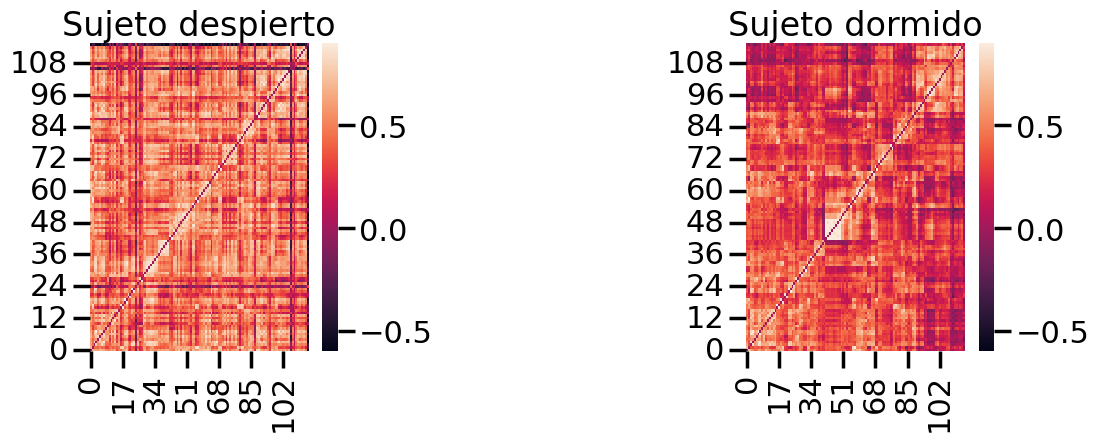

In [ ]:

plt.figure(figsize=(12,4))
plt.subplot(131)
sns.heatmap(matAdyacPesadaWake,vmin=-.6,vmax=.9)
plt.xlim(0,n)
plt.ylim(0,n)
plt.title('Sujeto despierto')

plt.subplot(133)
sns.heatmap(matAdyacPesadaSleep,vmin=-.6,vmax=.9)
plt.xlim(0,n)
plt.ylim(0,n)
plt.title('Sujeto dormido')

##Definamos una función útil para binarizar una matriz de adyacencia pesada en función de a densidades de enlances resultantes

In [ ]:
def density_to_th(W, d):
    n=W.shape[0]
    max_links = (n*(n-1))//2
    tril_idx = np.tril_indices(n,-1)
    c = sorted(np.array(list(W[tril_idx].reshape(-1))), reverse=True)
    return c[int((len(c)-1)*d)]

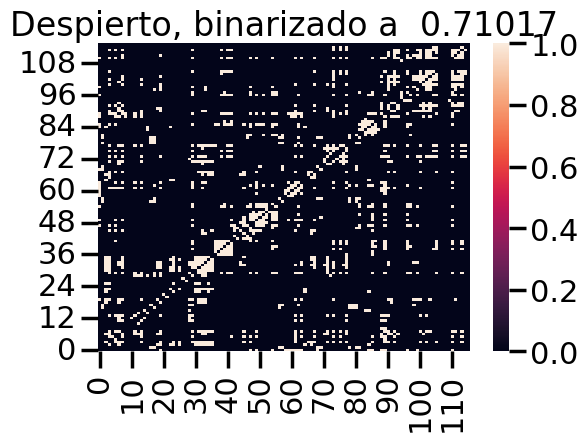

Text(0.5, 1.0, 'Dormido, binarizado a  0.57099')

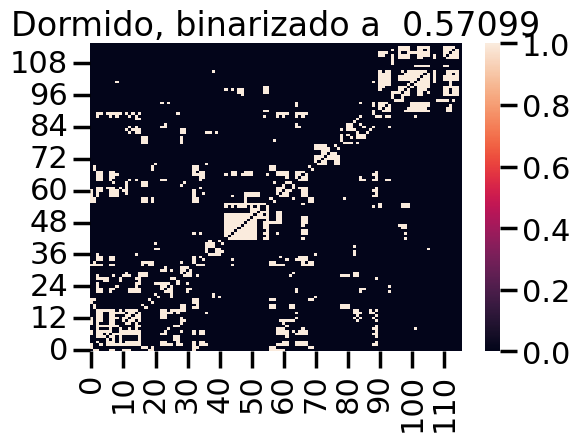

In [ ]:
densidad=0.1 # comparemos ambos estados con una densidad de enlaces de 10%

plt.figure(figsize=(6,4))

thWake=density_to_th(matAdyacPesadaWake, densidad)
sns.heatmap(matAdyacPesadaWake>=thWake)
plt.xlim(0,n)
plt.ylim(0,n);
plt.title(f'Despierto, binarizado a  {thWake}')
plt.show()

plt.figure(figsize=(6,4))
thSleep=density_to_th(matAdyacPesadaSleep, densidad)
sns.heatmap(matAdyacPesadaSleep>=thSleep)
plt.xlim(0,n)
plt.ylim(0,n);
plt.title(f'Dormido, binarizado a  {thSleep}')


## ¿Y la distribución de grados en ambos casos?

Text(0.5, 1.0, 'Distribucion de grados, despierto')

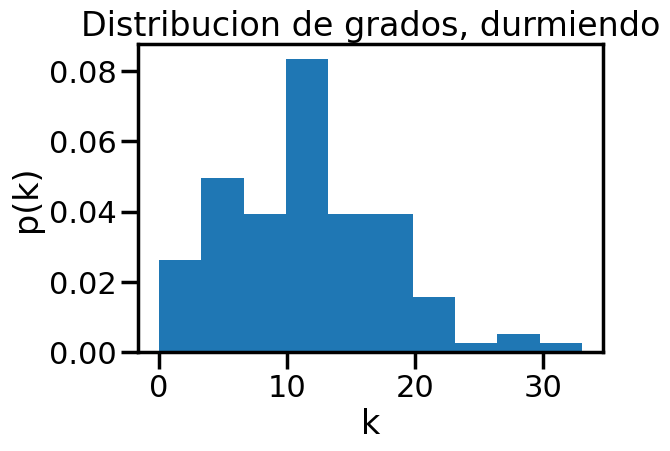

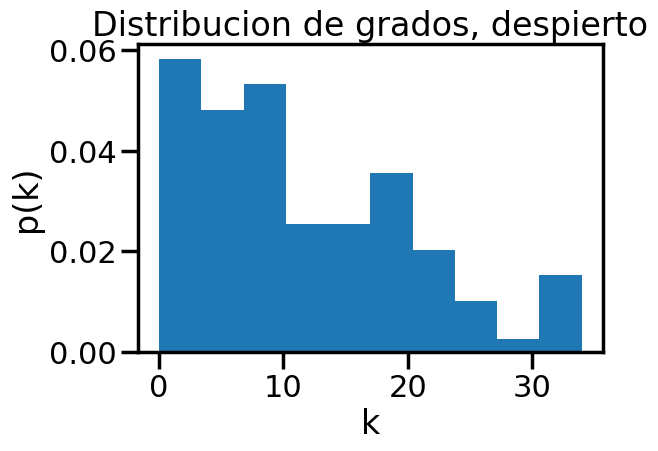

In [ ]:
plt.figure(figsize=(6,4))
Gsleep = nx.from_numpy_array(matAdyacPesadaSleep>=thSleep)
degreesSleep = [Gsleep.degree(n) for n in Gsleep.nodes()]
plt.hist(degreesSleep,bins=10,density=True)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Distribucion de grados, durmiendo')


plt.figure(figsize=(6,4))
Gwake = nx.from_numpy_array(matAdyacPesadaWake>=thWake)
degreesWake = [Gwake.degree(n) for n in Gwake.nodes()]
plt.hist(degreesWake,bins=10,density=True)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Distribucion de grados, despierto')